In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
fig_width = 20
t_titre = 35/2
t_label = 25/2
colors = ['black','dimgrey','grey','darkgrey','silver','rosybrown','lightcoral','indianred','firebrick','brown','darkred','red']


In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    #print(a)
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)
param = []
w = 0
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM','IP','LB','OP','RS','SR','TN','YK'] :
        a = 'parametre/param_Fit_%s.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)
        param[w]['sujet'] = liste[x][1]
        w = w + 1
print(len(colors)==len(param)==len(exp))

True


In [4]:
for x in range(len(param)) :
    print(param[x]['sujet'])

TN
SR
FM
LB
YK
DC
IP
AM
BMC
OP
CS
RS


In [5]:
print(param[0].keys())

dict_keys(['observer', 'tau', 'sujet', 'maxi', 'start_anti', 'v_anti', 'moyenne', 'latence'])


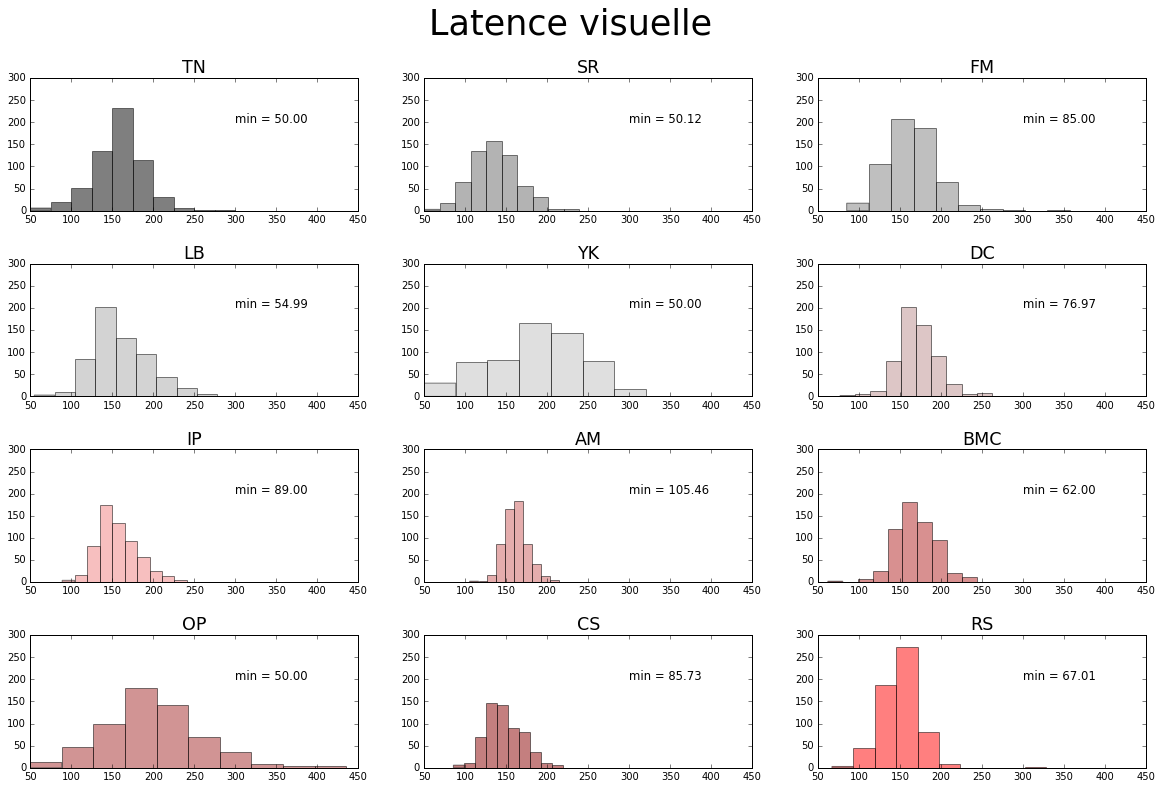

In [6]:
nb_sujet = len(param)
fig, axs = plt.subplots(4, 3, figsize=(fig_width, fig_width/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Latence visuelle", fontsize=t_titre*2)

a = 0
b = 0

for x in range(len(param)):
    lala = []
    for y in range(len(param[x]['latence'])) :
        lala.extend(param[x]['latence'][y])
    lala2 = np.ma.masked_array(lala, mask=np.isnan(lala)).compressed()
    axs[a][b].hist(lala2, color=colors[x], alpha=0.5) #, bins=np.arange(50, 450, 20))
    axs[a][b].text(300,200, 'min = %1.2f'%(np.min(lala2)), fontsize=t_titre/1.5)
    axs[a][b].set_title('%s'%(param[x]['sujet']), fontsize=t_titre)
    axs[a][b].axis([50,450,0,300])
    
    if b == 2 :
        b = 0
        a = a+1
    else :
        b = b+1
    

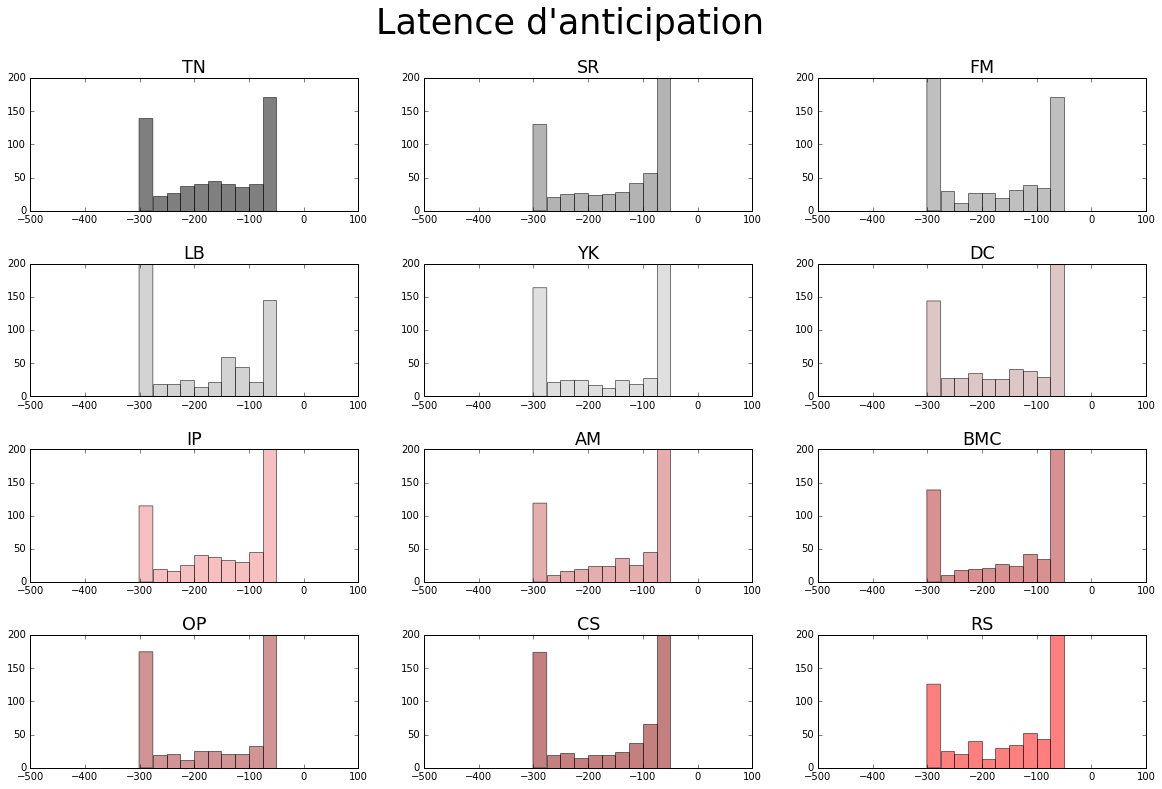

In [7]:
nb_sujet = len(param)
fig, axs = plt.subplots(4, 3, figsize=(fig_width, fig_width/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Latence d'anticipation", fontsize=t_titre*2)

a = 0
b = 0

for x in range(len(param)):
    lala = []
    for y in range(len(param[x]['start_anti'])) :
        lala.extend(param[x]['start_anti'][y])
    lala2 = np.ma.masked_array(lala, mask=np.isnan(lala)).compressed()
    axs[a][b].hist(lala2, color=colors[x], alpha=0.5)
    axs[a][b].set_title('%s'%(param[x]['sujet']), fontsize=t_titre)
    axs[a][b].axis([-500,100,0,200])
    if b == 2 :
        b = 0
        a = a+1
    else :
        b = b+1
    

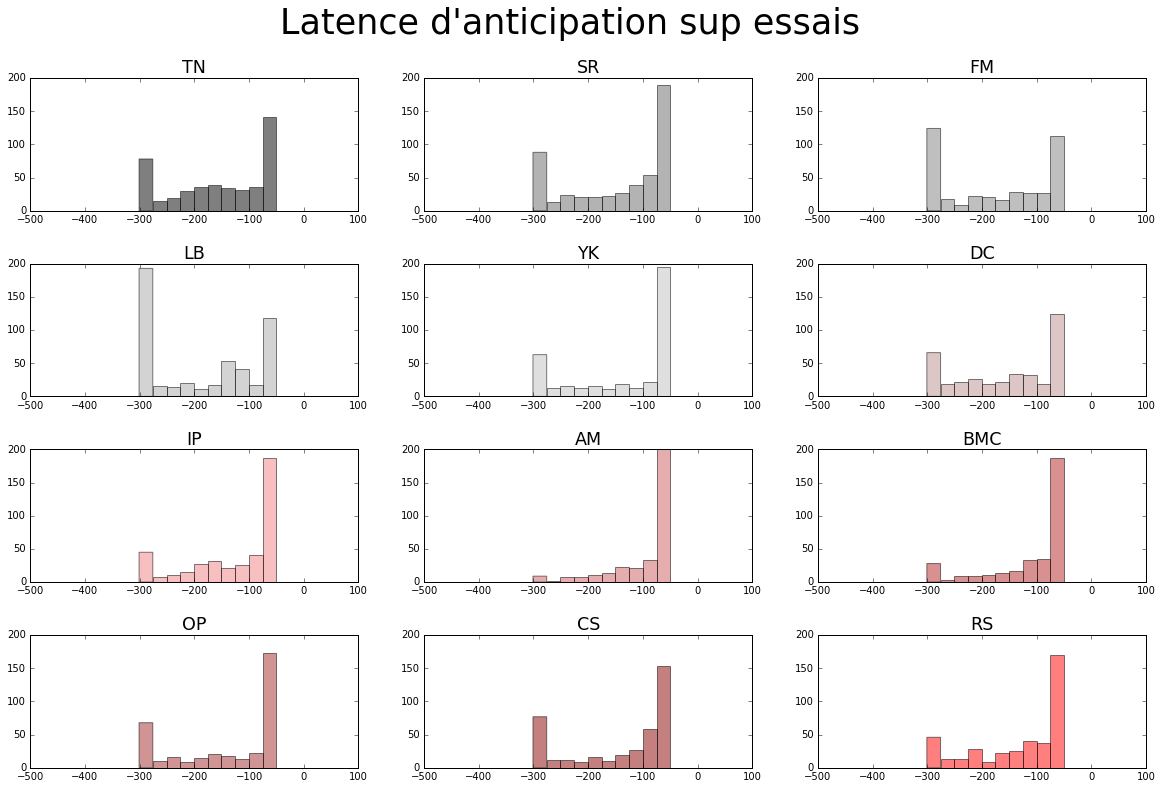

In [8]:
nb_sujet = len(param)
fig, axs = plt.subplots(4, 3, figsize=(fig_width, fig_width/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Latence d'anticipation sup essais", fontsize=t_titre*2)

a = 0
b = 0

for x in range(len(param)):
    lala = []
    for block in range(len(param[x]['start_anti'])) :
        for essai in range(len(param[x]['start_anti'][block])) :
            if abs(param[x]['v_anti'][block][essai]) > 3 :
                lala.append(param[x]['start_anti'][block][essai])
            else :
                lala.append(np.nan)
    lala2 = np.ma.masked_array(lala, mask=np.isnan(lala)).compressed()
    axs[a][b].hist(lala2, color=colors[x], alpha=0.5)
    axs[a][b].set_title('%s'%(param[x]['sujet']), fontsize=t_titre)
    axs[a][b].axis([-500,100,0,200])
    if b == 2 :
        b = 0
        a = a+1
    else :
        b = b+1
    

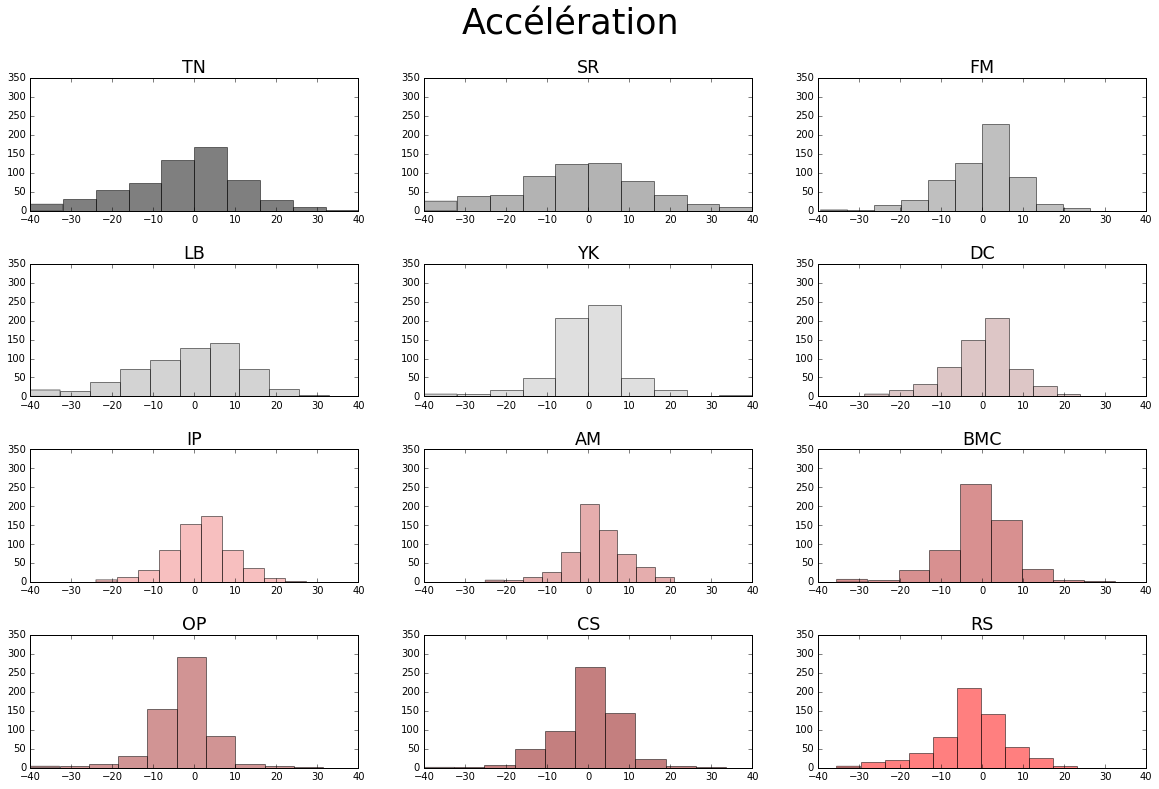

In [9]:
nb_sujet = len(param)
fig, axs = plt.subplots(4, 3, figsize=(fig_width, fig_width/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Accélération", fontsize=t_titre*2)

a = 0
b = 0

for x in range(len(param)):
    lala = []
    for y in range(len(param[x]['v_anti'])) :
        lala.extend(param[x]['v_anti'][y])
    lala2 = np.ma.masked_array(lala, mask=np.isnan(lala)).compressed()
    axs[a][b].hist(lala2, color=colors[x], alpha=0.5)
    axs[a][b].set_title('%s'%(param[x]['sujet']), fontsize=t_titre)
    axs[a][b].axis([-40,40,0,350])
    if b == 2 :
        b = 0
        a = a+1
    else :
        b = b+1
    